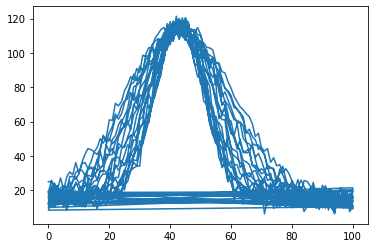

In [7]:
import numpy as np
from matplotlib import pyplot as plot
from scipy.optimize import curve_fit

beamData = np.loadtxt("beam-data.csv", delimiter=",")

plot.plot(beamData[:,0],beamData[:,1],label="beamData")
plot.show()

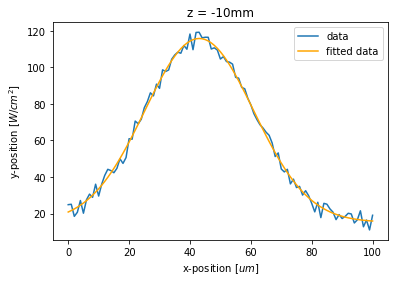

In [12]:
z = -10
mask = beamData[:, 2] == z #mask wählt alles, bei dem die letzte Spalte den Wert -10 hat

def gauss(x, A, w, x0, c):
    return A*np.exp(-0.5*(x-x0)**2/w**2) + c 

pFit, pCov = curve_fit(gauss, beamData[mask, 0], beamData[mask, 1], p0=[110,20,40,20])

plot.plot(beamData[mask ,0], beamData[mask ,1], label="data")
plot.plot(beamData[mask ,0], gauss(beamData[mask ,0], *pFit), label="fitted data", color="Orange")
plot.title(f"z = {z:.0f}mm")
plot.xlabel("x-position [$um$]")
plot.ylabel("y-position [$W/cm^2$]")
plot.legend()

In [13]:
pFit

array([100.56758217,  17.89582056,  43.05027897,  15.27425996])

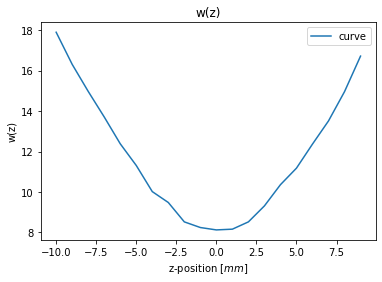

In [14]:
ws = []
zs = []
for z in beamData[:,2]:
    mask = beamData[:, 2] == z
    pFit, pCov = curve_fit(gauss, beamData[mask, 0], beamData[mask, 1], p0=[110,20,40,20])
    ws.append(pFit[1])
    zs.append(z)
"""
def square(x, a , b, c):
   return a*((x-b)**2)+c

pFitn, pCovn = curve_fit(square, zs, ws, p0=[5,0,8])
plot.plot(zs, square(ws, *pFitn), label="fitted curve")
"""
plot.plot(zs, ws, label="curve")
plot.title("w(z)")
plot.xlabel("z-position [$mm$]")
plot.ylabel("w(z)")
plot.legend()    


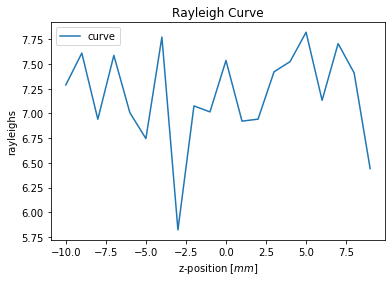

In [58]:
rayleighs = []
for z in zs:
    mask = beamData[:, 2] == z
    pFit, pCov = curve_fit(gauss, beamData[mask, 0], beamData[mask, 1], p0=[110,20,40,20])
    rayleighs.append(np.pi * pFit[3]**2 * 1 / pFit[0])
    
plot.plot(zs, rayleighs, label="curve")
plot.title("Rayleigh Curve")
plot.xlabel("z-position [$mm$]")
plot.ylabel("rayleighs")
plot.legend()    